In [190]:
import pandas as pd 
import numpy as np
import jieba
from wordcloud import WordCloud

In [148]:
import matplotlib.pyplot as plt

In [119]:
df = pd.read_csv(r"first9000.csv",encoding = 'utf-8',lineterminator="\n")
df = df.drop('Unnamed: 0',axis=1)
df.head()

,film,user,star,time,content
0,山村老尸,厌氧大蘑菇,暂未评价,2014-01-28,哈哈哈哈哈初中时候谁看过来着天天说剧情啊喂
1,山村老尸,大爷,推荐,2012-03-26,重温了一遍 依然觉得很恐怖 14.1.21又看了一遍 完全不觉得恐怖了……
2,山村老尸,火山君,力荐,2010-12-10,膜拜国产经典鬼片 膜拜！！！
3,山村老尸,Kepler 452b,还行,2013-03-15,还可以。有情人还是应该终成眷属啊
4,山村老尸,Cynthia,推荐,2010-02-06,高中同桌给我讲了完整的故事，后来看的还是觉得寒。少有的港式恐怖佳片，近年已不多见了


In [176]:
df['film'].value_counts()

霸王别姬            220
回到未来3           220
小鬼当家            220
喜剧之王            220
侏罗纪公园2：失落的世界    220
倚天屠龙记之魔教教主      220
好家伙             220
花田喜事            220
狮子王             220
鹿鼎记2：神龙教        220
飞鹰计划            220
海上钢琴师           220
我是谁             220
九品芝麻官           220
闻香识女人           220
山村老尸            220
阿甘正传            220
爱在黎明破晓前         220
搏击俱乐部           220
七宗罪             220
楚门的世界           220
这个杀手不太冷         220
醉拳2             220
情书              220
追随              220
唐伯虎点秋香          220
大话西游之大圣娶亲       220
跛豪              220
辛德勒的名单          220
勇敢者的游戏          220
射雕英雄传之东成西就      220
两杆大烟枪           220
心灵捕手            220
大话西游之月光宝盒       220
生死时速            220
活着              220
低俗小说            220
美丽人生            220
剪刀手爱德华          220
推手              220
饮食男女             73
春光乍泄             20
阳光灿烂的日子          20
青蛇               20
菊次郎的夏天           20
重庆森林             20
肖申克的救赎           20
泰坦尼克号            20
东邪西毒             20
绿里奇迹             20


In [120]:
df1 = df.copy()

In [121]:
df['star'].value_counts(dropna = False)

力荐      3907
推荐      3301
还行      1277
较差       250
暂未评价     220
很差       118
Name: star, dtype: int64

In [122]:
#  电影推荐指数 
recommend_list = pd.DataFrame(df.query("star == '力荐' | star == '推荐'").film.value_counts())
recommend_list.reset_index(inplace=True)
recommend_list.columns = ['filem','value']
recommend_list

,filem,value
0,九品芝麻官,203
1,追随,203
2,两杆大烟枪,203
3,这个杀手不太冷,202
4,辛德勒的名单,202
5,楚门的世界,199
6,阿甘正传,196
7,剪刀手爱德华,196
8,美丽人生,195
9,霸王别姬,195


## 好评率计算

In [131]:
# 去除 star 为“暂未评价”的数据
df_star = df.query("star != '暂未评价'")
score = {
    '力荐':5,
    '推荐':4,
    '还行':3,
    '较差':2,
    '很差':1
}
df_star['star'] = df_star["star"].map(score)
hight_praise_rate = df_star.groupby("film").mean()
hight_praise_rate.reset_index(inplace=True)
hight_praise_rate

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,film,star
0,七宗罪,4.361111
1,东邪西毒,4.300000
2,两杆大烟枪,4.635514
3,九品芝麻官,4.416667
4,低俗小说,4.309859
5,侏罗纪公园2：失落的世界,3.534884
6,倚天屠龙记之魔教教主,3.658879
7,剪刀手爱德华,4.351598
8,勇敢者的游戏,4.113208
9,唐伯虎点秋香,4.186916


In [180]:
# 排序
hight_praise_rate.sort_values(by='star' ,ascending=False)[:7] # 正序

,film,star
25,泰坦尼克号,4.789474
34,肖申克的救赎,4.700000
49,饮食男女,4.666667
38,辛德勒的名单,4.646512
2,两杆大烟枪,4.635514
46,霸王别姬,4.607477
39,这个杀手不太冷,4.550459


In [181]:
hight_praise_rate.sort_values(by='star' ,ascending=True)[:7] # 倒序

,film,star
17,山村老尸,3.140777
5,侏罗纪公园2：失落的世界,3.534884
6,倚天屠龙记之魔教教主,3.658879
35,花田喜事,3.694836
50,鹿鼎记2：神龙教,3.740566
20,我是谁,3.851163
48,飞鹰计划,3.882075


## 结巴分词

In [144]:
df['word'] = df['content'].map(lambda c: ' '.join(jieba.cut(c)))

df

,film,user,star,time,content,word
0,山村老尸,厌氧大蘑菇,暂未评价,2014-01-28,哈哈哈哈哈初中时候谁看过来着天天说剧情啊喂,哈哈哈 哈哈 初中 时候 谁 看 过来 着 天天 说 剧情 啊 喂
1,山村老尸,大爷,推荐,2012-03-26,重温了一遍 依然觉得很恐怖 14.1.21又看了一遍 完全不觉得恐怖了……,重温 了 一遍 依然 觉得 很 恐怖 14.1 . 21 又 看 了...
2,山村老尸,火山君,力荐,2010-12-10,膜拜国产经典鬼片 膜拜！！！,膜拜 国产 经典 鬼片 膜拜 ！ ！ ！
3,山村老尸,Kepler 452b,还行,2013-03-15,还可以。有情人还是应该终成眷属啊,还 可以 。 有情人 还是 应该 终成眷属 啊
4,山村老尸,Cynthia,推荐,2010-02-06,高中同桌给我讲了完整的故事，后来看的还是觉得寒。少有的港式恐怖佳片，近年已不多见了,高中 同桌 给 我 讲 了 完整 的 故事 ， 后来 看 的 还是 觉得 寒 。 少有 的 ...
5,山村老尸,丁一,很差,2010-01-24,农妇山泉有点甜，\r 哪只眼睛见到鬼？\r 吃水不忘咒怨女，\r 时刻想念楚人美\r,农妇 山泉 有点 甜 ， \r 哪 只 眼睛 见到 鬼 ？ \r 吃水 不 ...
6,山村老尸,Wornsknsk,力荐,2011-04-04,一个字 真他妈的吓人 哈哈哈哈,一个 字 真 他妈的 吓人 哈哈哈哈
7,山村老尸,所见非所得,还行,2011-06-13,我真的。。。一直以为是“老师”。。。。。。,我 真的 。 。 。 一直 以为 是 “ 老师 ” 。 。 。 。 。 。
8,山村老尸,ACSHW,还行,2010-11-23,01年暑假，租片子在表弟家看的,01 年 暑假 ， 租 片子 在 表弟 家 看 的
9,山村老尸,半透明,较差,2010-10-13,這是搞笑片，不是恐怖片。好垃圾。,這是 搞笑片 ， 不是 恐怖片 。 好 垃圾 。


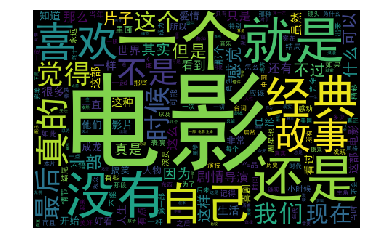

In [151]:
# 没用使用停用词的词云
all_word = df['word'].str.cat()

wc = WordCloud(width=450,height=300,max_font_size=150,font_path='SimHei.ttf')
wc.generate_from_text(all_word)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [170]:
# 读取停用词
with open(r"stop_words.txt",'r',encoding='utf-8') as f:
    stop_word = f.read()
    print(stop_word)

$
0
1
2
3
4
5
6
7
8
9
?
_
“
”
、
。
《
》
一
一些
一何
一切
一则
一方面
一旦
一来
一样
一般
一转眼
万一
上
上下
下
不
不仅
不但
不光
不单
不只
不外乎
不如
不妨
不尽
不尽然
不得
不怕
不惟
不成
不拘
不料
不是
不比
不然
不特
不独
不管
不至于
不若
不论
不过
不问
与
与其
与其说
与否
与此同时
且
且不说
且说
两者
个
个别
临
为
为了
为什么
为何
为止
为此
为着
乃
乃至
乃至于
么
之
之一
之所以
之类
乌乎
乎
乘
也
也好
也罢
了
二来
于
于是
于是乎
云云
云尔
些
亦
人
人们
人家
什么
什么样
今
介于
仍
仍旧
从
从此
从而
他
他人
他们
以
以上
以为
以便
以免
以及
以故
以期
以来
以至
以至于
以致
们
任
任何
任凭
似的
但
但凡
但是
何
何以
何况
何处
何时
余外
作为
你
你们
使
使得
例如
依
依据
依照
便于
俺
俺们
倘
倘使
倘或
倘然
倘若
借
假使
假如
假若
傥然
像
儿
先不先
光是
全体
全部
兮
关于
其
其一
其中
其二
其他
其余
其它
其次
具体地说
具体说来
兼之
内
再
再其次
再则
再有
再者
再者说
再说
冒
冲
况且
几
几时
凡
凡是
凭
凭借
出于
出来
分别
则
则甚
别
别人
别处
别是
别的
别管
别说
到
前后
前此
前者
加之
加以
即
即令
即使
即便
即如
即或
即若
却
去
又
又及
及
及其
及至
反之
反而
反过来
反过来说
受到
另
另一方面
另外
另悉
只
只当
只怕
只是
只有
只消
只要
只限
叫
叮咚
可
可以
可是
可见
各
各个
各位
各种
各自
同
同时
后
后者
向
向使
向着
吓
吗
否则
吧
吧哒
吱
呀
呃
呕
呗
呜
呜呼
呢
呵
呵呵
呸
呼哧
咋
和
咚
咦
咧
咱
咱们
咳
哇
哈
哈哈
哉
哎
哎呀
哎哟
哗
哟
哦
哩
哪
哪个
哪些
哪儿
哪天
哪年
哪怕
哪样
哪边
哪里
哼
哼唷
唉
唯有
啊
啐
啥
啦
啪达
啷当
喂
喏
喔唷
喽
嗡
嗡嗡
嗬
嗯
嗳
嘎
嘎登
嘘
嘛
嘻
嘿
嘿嘿
因
因为
因了
因此
因着
因而
固然
在
在下
在于
地
基于
处在
多
多么
多少
大
大家
她
她们
好
如
如上
如上所述
如下
如何
如其

In [171]:
# 去除停用词
def deleteStopWord(sentence):
    s = ''
    for i in sentence.split(" "):
        if i not in stop_word:
            s += i + " "
    return s
df['remove_stopwords'] = df['word'].map(lambda c : deleteStopWord(c))

In [172]:
df.head()

,film,user,star,time,content,word,remove_stopwords
0,山村老尸,厌氧大蘑菇,暂未评价,2014-01-28,哈哈哈哈哈初中时候谁看过来着天天说剧情啊喂,哈哈哈 哈哈 初中 时候 谁 看 过来 着 天天 说 剧情 啊 喂,哈哈哈 初中 天天 剧情
1,山村老尸,大爷,推荐,2012-03-26,重温了一遍 依然觉得很恐怖 14.1.21又看了一遍 完全不觉得恐怖了……,重温 了 一遍 依然 觉得 很 恐怖 14.1 . 21 又 看 了...,重温 一遍 依然 觉得 恐怖 14.1 . 21 一遍 完全 觉得 恐怖 … …
2,山村老尸,火山君,力荐,2010-12-10,膜拜国产经典鬼片 膜拜！！！,膜拜 国产 经典 鬼片 膜拜 ！ ！ ！,膜拜 国产 经典 鬼片 膜拜
3,山村老尸,Kepler 452b,还行,2013-03-15,还可以。有情人还是应该终成眷属啊,还 可以 。 有情人 还是 应该 终成眷属 啊,有情人 应该 终成眷属
4,山村老尸,Cynthia,推荐,2010-02-06,高中同桌给我讲了完整的故事，后来看的还是觉得寒。少有的港式恐怖佳片，近年已不多见了,高中 同桌 给 我 讲 了 完整 的 故事 ， 后来 看 的 还是 觉得 寒 。 少有 的 ...,高中 同桌 讲 完整 故事 后来 觉得 寒 少有 港式 恐怖 佳片 近年 不多见


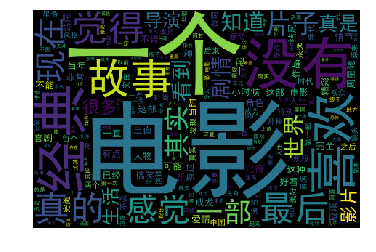

In [173]:
# 去除停用词的词云
all_words = df['remove_stopwords'].str.cat()

wc = WordCloud(width=450,height=300,max_font_size=150,font_path='SimHei.ttf')
wc.generate_from_text(all_words)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [186]:
# 进行词频统计
from collections import Counter 
cnts = Counter(all_words.split(" "))
cnts = pd.DataFrame(cnts.items(),columns=['word','counts'])
# cnts

# 排序
cnts.sort_values(by='counts' ,ascending=False)[:7] 

,word,counts
202,电影,2188
48,一个,1302
13,…,1110
10,.,1086
103,~,1074
294,没有,874
16,经典,809


## 使用 snownlp简单的情感分析

In [187]:
from snownlp import SnowNLP
text = SnowNLP(df["remove_stopwords"][0])
sent = text.sentences
for sen in sent:
    s = SnowNLP(sen)
    print(s.sentiments)

0.9613608346402495


In [191]:
def get_sentiments_score(comment):
    sents = SnowNLP(comment).sentences # 分句
    sentiment_score = np.mean([SnowNLP(sent).sentiments for sent in sents])
    return sentiment_score

df['sentiment_score'] = df["content"].map(get_sentiments_score)
df.head()

D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,film,user,star,time,content,word,remove_stopwords,sentiment_score
0,山村老尸,厌氧大蘑菇,暂未评价,2014-01-28,哈哈哈哈哈初中时候谁看过来着天天说剧情啊喂,哈哈哈 哈哈 初中 时候 谁 看 过来 着 天天 说 剧情 啊 喂,哈哈哈 初中 天天 剧情,0.948446
1,山村老尸,大爷,推荐,2012-03-26,重温了一遍 依然觉得很恐怖 14.1.21又看了一遍 完全不觉得恐怖了……,重温 了 一遍 依然 觉得 很 恐怖 14.1 . 21 又 看 了...,重温 一遍 依然 觉得 恐怖 14.1 . 21 一遍 完全 觉得 恐怖 … …,0.970697
2,山村老尸,火山君,力荐,2010-12-10,膜拜国产经典鬼片 膜拜！！！,膜拜 国产 经典 鬼片 膜拜 ！ ！ ！,膜拜 国产 经典 鬼片 膜拜,0.987265
3,山村老尸,Kepler 452b,还行,2013-03-15,还可以。有情人还是应该终成眷属啊,还 可以 。 有情人 还是 应该 终成眷属 啊,有情人 应该 终成眷属,0.783374
4,山村老尸,Cynthia,推荐,2010-02-06,高中同桌给我讲了完整的故事，后来看的还是觉得寒。少有的港式恐怖佳片，近年已不多见了,高中 同桌 给 我 讲 了 完整 的 故事 ， 后来 看 的 还是 觉得 寒 。 少有 的 ...,高中 同桌 讲 完整 故事 后来 觉得 寒 少有 港式 恐怖 佳片 近年 不多见,0.787347
